# Multi-Class Classifier

In [1]:
# All required libraries and functions  are imported in this cell
from __future__ import division     # Enable floating point division 
from IPython.utils import io        # Suppress undesired print commands  
import os as os                     # Operating system funcitons for navigation pursposes
import numpy as np                  # Numerical Library for matrix operations
import numpy.random as npr
import matplotlib.pyplot as plt     # Plotting Library 
import scipy.optimize as spo
import scipy.io as sio
import scipy.misc as scm
import warnings as iw
import operator                     # Utility for sorting index of value in array

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Sharp plots  

data_dir="C:/GitHub/ML_Coursera/ex3/data/"

## A: Supporting functions 
###### Collection of supporting functions that are provided in the exercise

In [2]:
def lg_hyp(X,theta):
    z = np.matmul(X,theta)
    return 1/(1+np.exp(-z))

# Restructure unrolled data of grayscale intensity 
def select_data(X,idx):
    row, col = 20, 20         # unroll: 400 = [20, 20]
    px_data  = X[idx]         # select an example 
    
    #  Generate matrix of normalized values
    px_mat   = (px_data/max(px_data)).reshape((row, col))*255    
    return px_mat.T           # Make the image vertical 

def displayData(X):
    rand=((X.shape[0]*npr.random(100)).astype(int)).reshape(10,10)  # Generate a 10,10 grid of random numbers [0,5000)
    pic=np.zeros((200,200))
    for i in range(10):
        for j in range(10):
            mat_a=select_data(X,rand[i][j])
            pic[20*i:20*(i+1),20*j:20*(j+1)]=mat_a    # big_mat[row_range,col_range]=small_mat
    return scm.toimage(pic)                              # 'L' for Grey Scale 

def classifer_ymat(y):
    y_mat=np.zeros((5000,10))
    theta_mat=np.zeros((10,401))
    for i in np.arange(len(y)):
        j=y[i]%10
        y_mat[i][j]=1
    return y_mat

def blackbox_optimizer(itheta, x_mat, y, lambdA):
        return spo.fmin_bfgs(lrCostFunction, x0=itheta, args=(x_mat, y, lambdA), maxiter=100, \
                      fprime=costPrimeFunction,disp=True,full_output=True)
    
# Partial derivative of the cost function (vectorized)
def costPrimeFunction(theta, X, y,lambdA=0):
    H=lg_hyp(X,theta)
    t1     = np.matmul(X.T,(H-y))/m
    t2_reg = (lambdA/m)*theta
    t2_reg[0] = 0
    gradient = t1+t2_reg
    return gradient

## B: Utility functions

###### Data Retival and configurating functions

In [3]:
# Return the contents of the data file
def load_data(data_dir,f_name):                       
    os.chdir(data_dir)
    data=sio.loadmat(f_name)
    return data

## 1 Multi-class Classification

## 1.1 Dataset

In [4]:
data=load_data(data_dir,'ex3data1.mat')             # sio.loadmat returns a dictionary
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [5]:
X=data['X']
y=data['y']     #  y tells us the value for the training example [1:9]-->[1:9],0-->10
print X.shape,y.shape

(5000L, 400L) (5000L, 1L)


 ## 1.2 Visualizing the data

In [6]:
# Restructure unrolled data of grayscale intensity 
def select_data(X,idx):
    row, col = 20, 20         # unroll: 400 = [20, 20]
    px_data  = X[idx]         # select an example 
    
    #  Generate matrix of normalized values
    px_mat   = (px_data/max(px_data)).reshape((row, col))*255    
    return px_mat.T           # Make the image vertical 

In [7]:
def displayData(X):
    rand=((X.shape[0]*npr.random(100)).astype(int)).reshape(10,10)  # Generate a 10,10 grid of random numbers [0,5000)
    pic=np.zeros((200,200))
    for i in range(10):
        for j in range(10):
            mat_a=select_data(X,rand[i][j])
            pic[20*i:20*(i+1),20*j:20*(j+1)]=mat_a    # big_mat[row_range,col_range]=small_mat
    return scm.toimage(pic)                              # 'L' for Grey Scale 

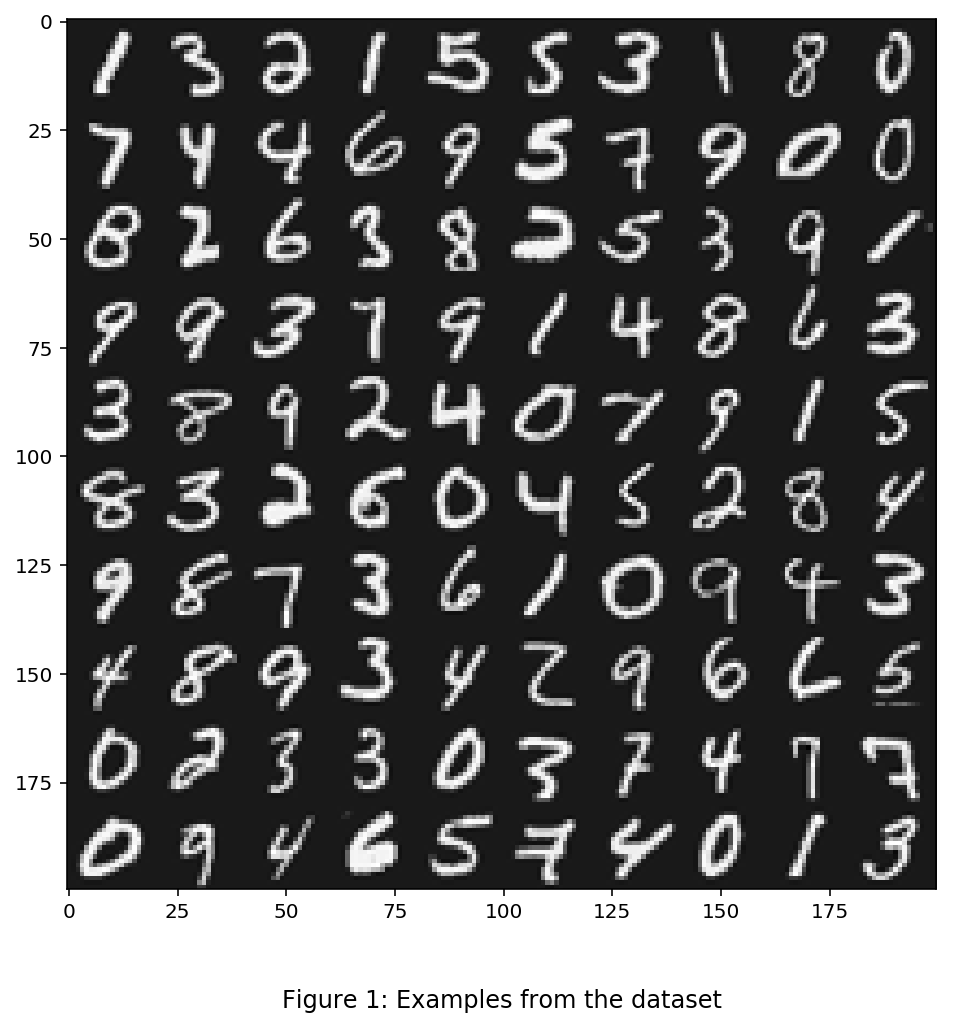

In [8]:
img=displayData(X)
#Lets plot the image
plt.figure(figsize=(8,8))
plt.title('Figure 1: Examples from the dataset',y=-0.15)
plt.imshow(img, cmap='gray')

## 1.3 Vectorizing Logistic Regression

### 1.3.1 Vectorizing the cost function w/ regularization

#### lrCostFunction-------------------------------------------------------------------------------------------------------------------------------

In [9]:
# Define cost function for logistic regression
def lrCostFunction(theta,X,y,lambdA=0):
    H=lg_hyp(X,theta)
    
    t1 = -np.matmul(y.T    , np.log(H))/m
    t2 = -np.matmul((1-y).T, np.log(1-H))/m
    t3_reg   = lambdA/(2*m)*np.matmul(theta[1:].T,theta[1:])
    
    cost=t1+t2+t3_reg
    return cost

### 1.3.2 Vectorizing the gradient w/ regularization

In [10]:
# Partial derivative of the cost function (vectorized)
def costPrimeFunction(theta, X, y,lambdA=0):
    H=lg_hyp(X,theta)
    t1     = np.matmul(X.T,(H-y))/m
    t2_reg = (lambdA/m)*theta
    t2_reg[0] = 0
    gradient = t1+t2_reg
    return gradient

In [11]:
def blackbox_optimizer(itheta, x_mat, y, lambdA):
        return spo.fmin_bfgs(lrCostFunction, x0=itheta, args=(x_mat, y, lambdA), maxiter=100, \
                      fprime=costPrimeFunction,disp=True,full_output=True)

## 1.4 One-vs-all Classification

In [12]:
def classifer_ymat(y):
    y_mat=np.zeros((5000,10))
    theta_mat=np.zeros((10,401))
    for i in np.arange(len(y)):
        j=y[i]%10
        y_mat[i][j]=1
    return y_mat

In [13]:
y_mat  = classifer_ymat(y)
y_mat.shape

(5000L, 10L)

###### oneVsAll--------------------------------------------------------------------------------------------------------------------------------------------------- 

In [14]:
def oneVsAll(X,y):                       # X=X with ones
    y_mat  = classifer_ymat(y)
    m      = X.shape[0]                  # m=5000
    n      = x_mat.shape[1]              # n=401
    no_classifier = len(np.unique(y))
    lambdA=0
    
    itheta    = np.zeros(n)                 # theta.shape=[401,]
    theta_mat = np.zeros((no_classifier,n))
    for i in range(10):
        yi     = y_mat[:,i]
        print 'Training classifier for recognizing %d...'%i
        with io.capture_output() as captured: # Suppress print o/p
            fn_opt = blackbox_optimizer(itheta=itheta, x_mat=x_mat, y=yi, lambdA=0)
        theta_mat[i:] = fn_opt[0]
    print 'Training is complete!'
    return theta_mat  

In [15]:
iw.filterwarnings(action='ignore')
m     = X.shape[0]
x_mat = np.c_[np.ones(m),X]
n     = x_mat.shape[1] 

theta_mat = oneVsAll(X = x_mat ,y = y)

Training classifier for recognizing 0...
Training classifier for recognizing 1...
Training classifier for recognizing 2...
Training classifier for recognizing 3...
Training classifier for recognizing 4...
Training classifier for recognizing 5...
Training classifier for recognizing 6...
Training classifier for recognizing 7...
Training classifier for recognizing 8...
Training classifier for recognizing 9...
Training is complete!


### 1.4.1 One-vs-all Prediction

###### predictOneVsAll-----------------------------------------------------------------------------------------------------------------------------------------

In [16]:
ms_clf=[]                        # Track misclassified training examples in the training data
def predictOneVsAll(theta_mat,x_mat,y):
    yp_mat=lg_hyp(theta_mat,x_mat.T).T
    ct=0
    yp=np.zeros(5000)
    for i in range(x_mat.shape[0]):
        #index, value = max(enumerate(my_list), key=operator.itemgetter(1))
        yp[i]=max(enumerate(yp_mat[i,:]), key=operator.itemgetter(1))[0]
        if yp[i]%10==y[i][0]%10:ct=ct+1
        else: ms_clf.append(i)
    return 100*ct/x_mat.shape[0]

Accuracy=predictOneVsAll(theta_mat,x_mat,y)
print "The Accuracy over the training set using OneVsAll: %0.2f%%"%Accuracy,"\n", \
      "Expected Accuracy: 94.9%"   

The Accuracy over the training set using OneVsAll: 94.98% 
Expected Accuracy: 94.9%


Note: All classifier output a certain probabilty for every example. The predicted value is assigned to the calssifer that the outputs highest probability.

Lets have a look at some of the missclassified examples

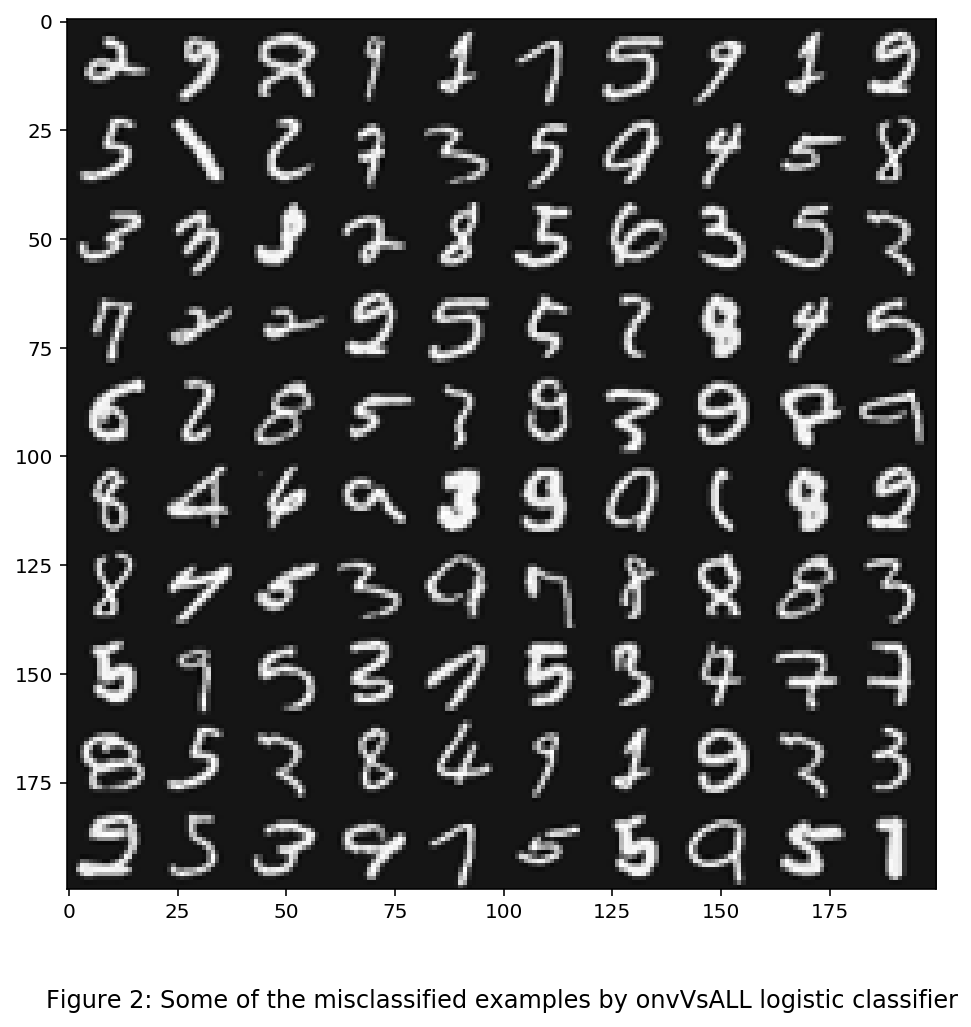

In [17]:
img=displayData(X[ms_clf]);

plt.figure(figsize=(8,8))
plt.title('Figure 2: Some of the misclassified examples by onvVsALL logistic classifier',y=-0.15)
plt.imshow(img, cmap='gray')

Personal Note: It is quite interesting to think about how most of these examples are so easy to classify when you look at it. One of the reason is that in this classifier we do not have co-related features. On giving a thought to how I think, it seems obvious we use spatial co-relation in identifying objects. I have always felt fascinated by how we filter information. On first thought it looks like we do not always group object features at the finest resolution that is available to us. Sometimes we have to look harder/carefully to figure stuff out, this is when we start utilizing more information. Thus, attention to detail is some ways is a metric for amount of resources to utilized by brain based on what individual deems fit...Isn't nature and evolution amazing!

# 2 Neural Networks

## 2.1 Model representation

In [18]:
# Lets reload the data
data=load_data(data_dir,'ex3data1.mat')             # sio.loadmat returns a dictionary
X=data['X']
y=data['y']     #  y tells us the value for the training example [1:9]-->[1:9],0-->10
print X.shape,y.shape

(5000L, 400L) (5000L, 1L)


In [19]:
data_nn=load_data(data_dir,'ex3weights.mat')             # sio.loadmat returns a dictionary
print data_nn.keys()

['Theta2', '__version__', '__header__', 'Theta1', '__globals__']


In [20]:
THETA =[data_nn['Theta1'],data_nn['Theta2']]
print THETA[0].shape, THETA[1].shape,

(25L, 401L) (10L, 26L)


##  2.2 Feedforward Propagation and Prediction

In [21]:
# np.insert is awesome
def feedForwardPropagation(Xi,THETA):              # Forward propagation
    var_x=Xi
    print var_x.shape
    for i in np.arange(len(THETA)):
        layer_Ip=np.insert(var_x,0,1)                         # Add 1 to x 
        print THETA[i].shape,layer_Ip.shape
        var_x=lg_hyp(THETA[i],layer_Ip)                       # activaiton
        
    Op  = var_x
    idx = max(enumerate(Op), key=operator.itemgetter(1))[0]   # Index of max prob. elememt
    
    '''
    Last unit predicts for 0, since we have 0 index in Python. 
    I made small adjustment so that idx can be converted to output. 
    '''
    yp  = (idx+1)%10                                
    return yp

In [22]:
feedForwardPropagation(X[1],THETA)

(400L,)
(25L, 401L) (401L,)
(10L, 26L) (26L,)


0

#### ffd_loop (predict)----------------------------------------------------------------------------------------------------------------------------

In [23]:
def ffd_loop(m,X,THETA,y):
    ms_clf=[]                   # List that tracks indices of misclassified data
    for i in np.arange(m):
        with io.capture_output() as captured: # Suppress print o/p
            yp = feedForwardPropagation(X[i],THETA)
        if yp != y[i]: 
            ms_clf.append(i)
    return ms_clf     

#### Important NOTE: 
<1> 1. The Neural Network outputs 0 on 10th index (9 in python)  (add +1 to index take mod 10 to get it to output 0)
<2> 2. Zero is indicated by number 10 in y (take  mod 10 of y to get it to output zero)
<3> 3. Now O/P=O/P value

In [24]:
m=X.shape[0]
ymod10=y%10
ms_clf = ffd_loop(m,X=X,THETA=THETA,y=ymod10)
print "Accuracy of the implemented Neural Network: %0.2f%%" %(100*(m-len(ms_clf))/m), '\n'\
      "Expected Accuracy: 97.5%"   

Accuracy of the implemented Neural Network: 97.52% 
Expected Accuracy: 97.5%


In [25]:
# Lets Look at some of the misclassified examples

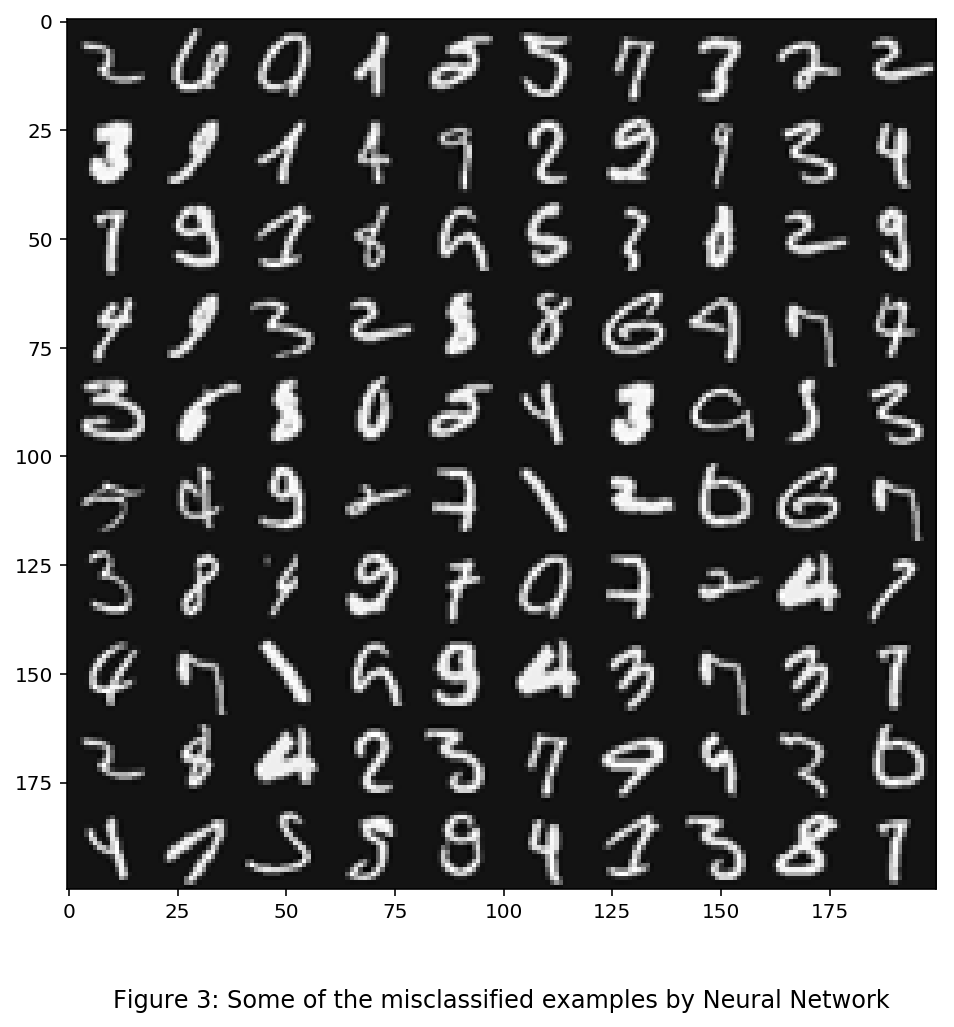

In [26]:
img=displayData(X[ms_clf]);

plt.figure(figsize=(8,8))
plt.title('Figure 3: Some of the misclassified examples by Neural Network',y=-0.15)
plt.imshow(img, cmap='gray')